# Машинное обучение


В финальной версии ноутбука, которая отправляется для сдачи задания, должны быть быть выполнены следующие условия:
* все ячейки выполнены для представленной в ноутбуке версии кода
* результаты выполнения ячеек отображены и согласованы с кодом
* при повторном запуске ячеек результаты должны воспроизводиться с точностью до случайности


## Кластеризация

![Digits](https://www.dropbox.com/s/nrjiahdbpswd63y/digits.png?dl=1)

Задача [кластеризации](https://en.wikipedia.org/wiki/Cluster_analysis) данных является одним из примеров задач обучения "без учителя". Она заключается в разбиении множества объектов на заданное число кластеров, при этом предполагается, что внутри одного кластера будут находиться похожие между собой объекты. Одним из примеров методов кластеризации является алгоритм [KMeans](https://en.wikipedia.org/wiki/K-means_clustering).

### Выбор числа кластеров

Для некоторых алгоритмов кластеризации число кластеров является гиперпараметром (например, в случае KMeans). Поэтому для выбора количества кластеров может быть использован следующий подход: при фиксированной метрике качества для разного числа кластеров обучают алгоритм и выбирают то значение гиперпараметра, начиная с которого качество "стабилизируется".

### Метрики качества

Оценивание качества построенной кластеризации — не всегда тривиальная задача, поскольку следует учитывать ряд фактов:
 - объекты одного класса должны быть более похожими, чем объекты других кластеров, относительно некоторой заданной метрики похожести
 - метрика не должна учитывать истинные значения меток объектов, попавших в кластер (в случае, если истинные метки известны)

При выполнении задания для оценки качества получившейся кластеризации воспользуемся следующими метриками:
 - [Homogeneity и Completeness](http://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness-and-v-measure) 
 - [Adjusted Rand index](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index) 
 - [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient)

Загрузите набор данных [digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Перед применением алгоритмов не забудьте перемешать изображения в случайном порядке.

(1797, 64)


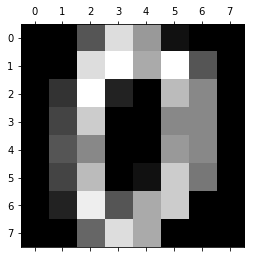

In [1]:
%matplotlib inline
from sklearn.datasets import load_digits
digits=load_digits()
print(digits.data.shape)
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [3]:
from sklearn.utils import shuffle
X, images, y = shuffle(digits['data'], digits['images'], digits['target'])

In [4]:
X

array([[  0.,   0.,   5., ...,   2.,   0.,   0.],
       [  0.,   0.,  13., ...,  15.,   1.,   0.],
       [  0.,   0.,   2., ...,  16.,   7.,   0.],
       ..., 
       [  0.,   0.,   0., ...,   6.,   0.,   0.],
       [  0.,   0.,   6., ...,   0.,   0.,   0.],
       [  0.,   0.,   6., ...,   5.,   0.,   0.]])

**1.** Кластеризуйте изображения при помощи алгоритма [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), подобрав число кластеров для любой фиксированной метрики из указанных выше. Рассмотрите различные способы выбора начального приближения (параметр *init*). Оцените качество получившейся кластеризации, используя все описанные выше метрики. Визуализируйте изображения, соответствующие центроидам лучшей кластеризации.

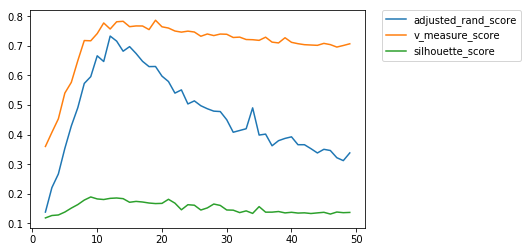

In [5]:
%matplotlib inline
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

for metr in ['adjusted_rand_score', 'v_measure_score', 'silhouette_score']:
    metrics_score = []
    for i in range(2, 50):
        kmeans = KMeans(n_clusters=i, init='random')
        labels = kmeans.fit_predict(X)
        if metr == 'silhouette_score':
            metrics_score.append(getattr(metrics, metr)(X, labels))
        else:
            metrics_score.append(getattr(metrics, metr)(y, labels))
    
    plt.plot([i for i in range(2, 50)], metrics_score, label=metr)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

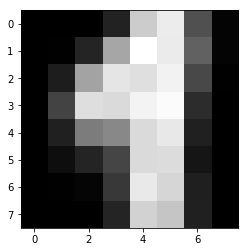

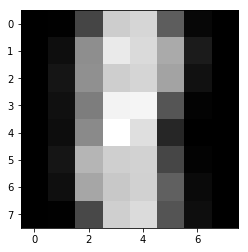

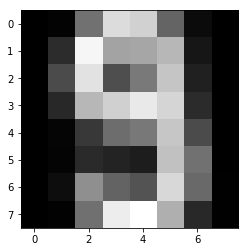

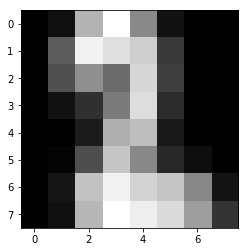

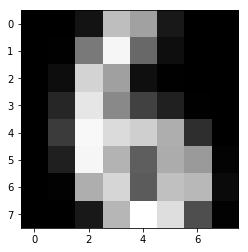

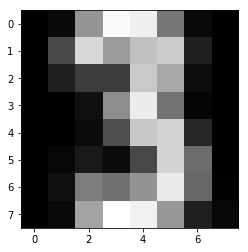

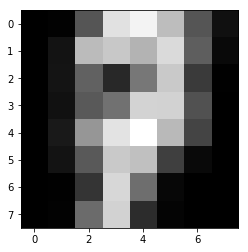

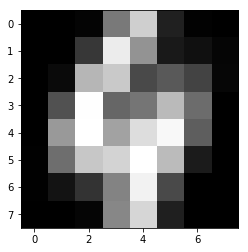

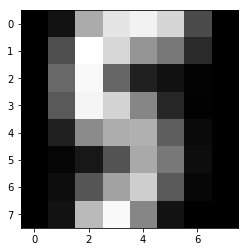

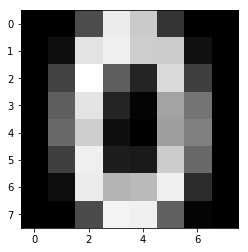

In [6]:
%matplotlib inline
kmeans = KMeans(n_clusters=10, init='random')
kmeans.fit_predict(X)
centers = kmeans.cluster_centers_
centers = centers.reshape((10, 8, 8))
for center in centers:
    plt.figure()
    plt.imshow(center)

Не всегда бывает удобно работать с полной матрицей объект-признак — например, для визуализации подходят лишь выборки размерности не больше трёх. На лекциях был рассмотрен метод уменьшения размерности *PCA*. В документации sklearn есть [сравнение](http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#example-manifold-plot-lle-digits-py) различных способов понижения размерности для проекции на плоскость. На изображениях видно, что некоторые преобразования дают неплохую визуализацию, где одинаковые цифры расположены близко друг к другу. Посмотрим, поможет ли это на практике.
 
**2. ** Примените преобразование [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)(для числа компонент 2 и 10), проведите кластеризацию в новых признаковых пространствах и сравните результаты с предыдущими. Нашелся ли метод кластеризации, превосходящий другие по всем метрикам? Являются ли все три метрики согласованными? Можете ли вы объяснить, почему так произошло?

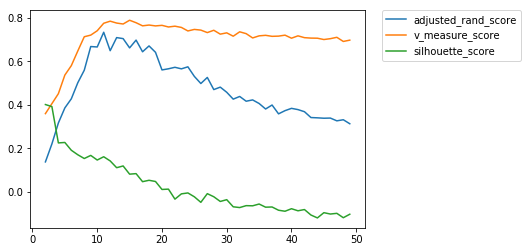

In [7]:
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_2_dim = pca.fit_transform(X)

for metr in ['adjusted_rand_score', 'v_measure_score', 'silhouette_score']:
    metrics_score = []
    for i in range(2, 50):
        kmeans = KMeans(n_clusters=i, init='random')
        labels = kmeans.fit_predict(X)
        if metr == 'silhouette_score':
            metrics_score.append(getattr(metrics, metr)(X_2_dim, labels))
        else:
            metrics_score.append(getattr(metrics, metr)(y, labels))
    
    plt.plot([i for i in range(2, 50)], metrics_score, label=metr)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

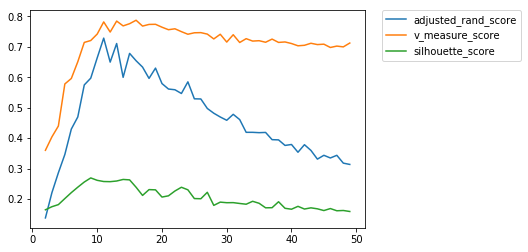

In [11]:
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_10_dim = pca.fit_transform(X)

for metr in ['adjusted_rand_score', 'v_measure_score', 'silhouette_score']:
    metrics_score = []
    for i in range(2, 50):
        kmeans = KMeans(n_clusters=i, init='random')
        labels = kmeans.fit_predict(X)
        if metr == 'silhouette_score':
            metrics_score.append(getattr(metrics, metr)(X_10_dim, labels))
        else:
            metrics_score.append(getattr(metrics, metr)(y, labels))
    
    plt.plot([i for i in range(2, 50)], metrics_score, label=metr)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**3. ** Визуализируйте несколько изображений, которые во всех случаях были отнесены к неправильному кластеру (объект назовем ошибочно отнесенным, если он имеет иную метку класса, нежели большая часть объектов в кластере). Можете ли вы пояснить, почему так произошло?

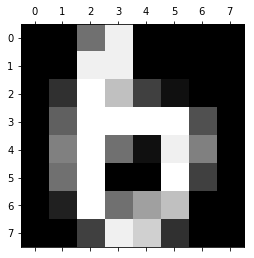

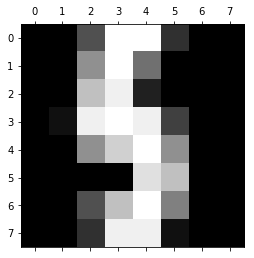

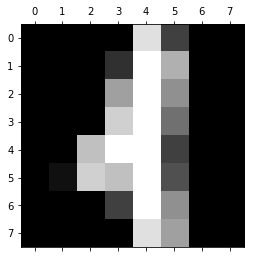

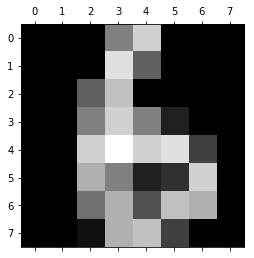

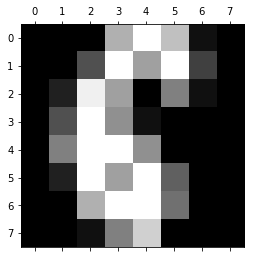

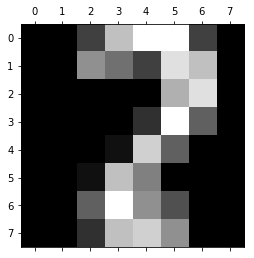

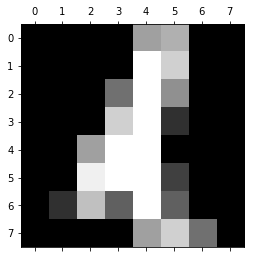

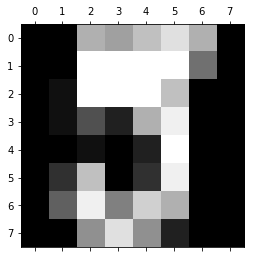

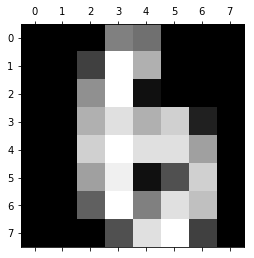

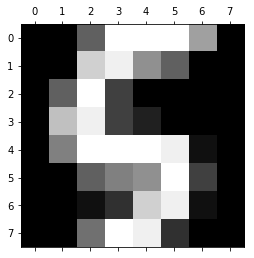

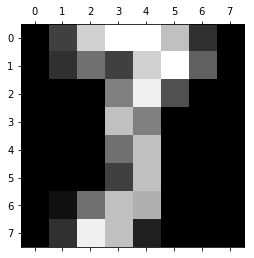

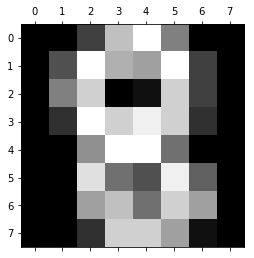

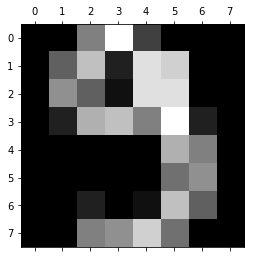

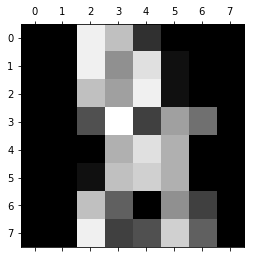

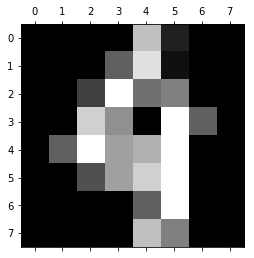

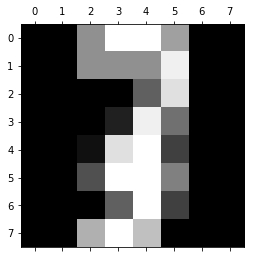

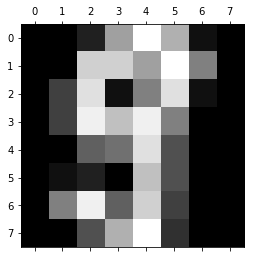

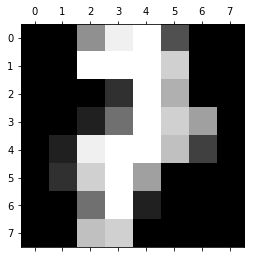

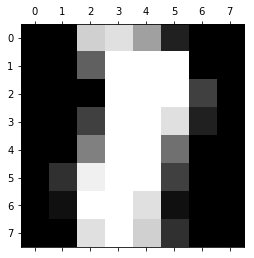

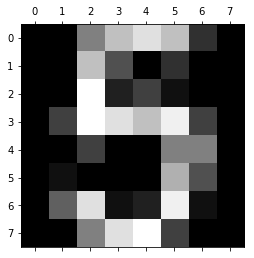

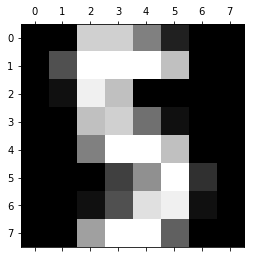

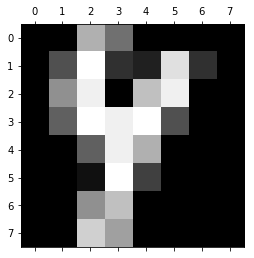

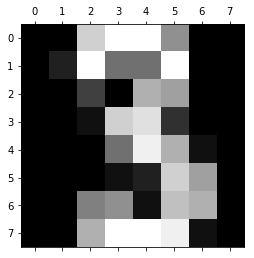

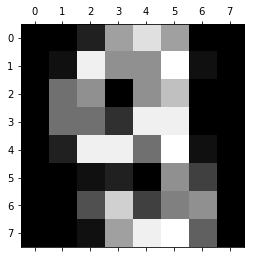

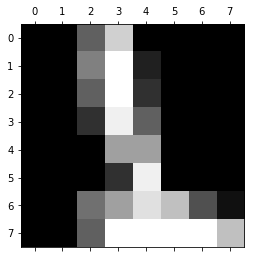

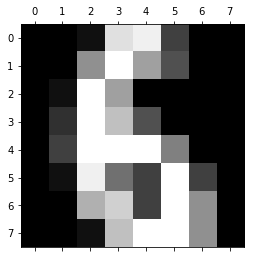

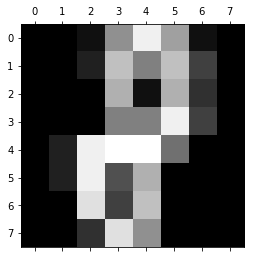

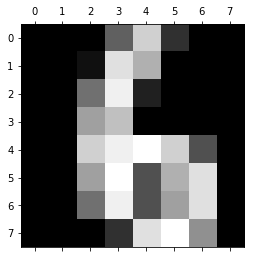

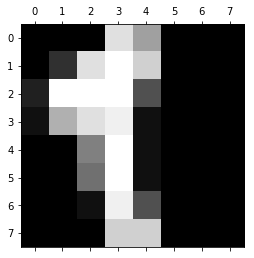

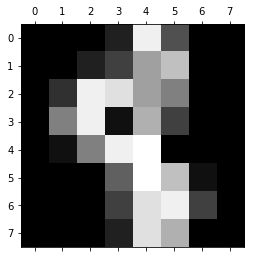

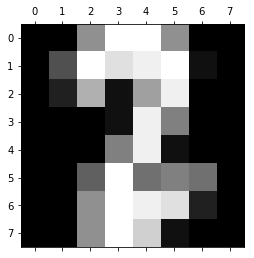

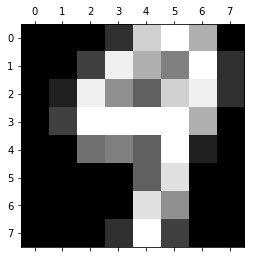

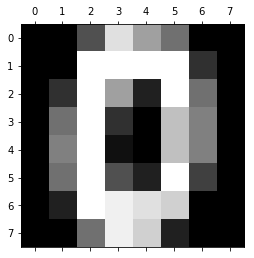

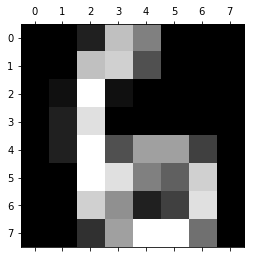

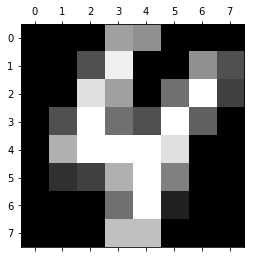

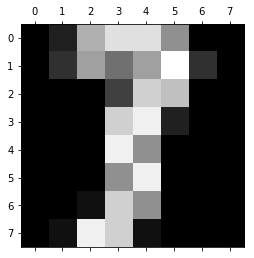

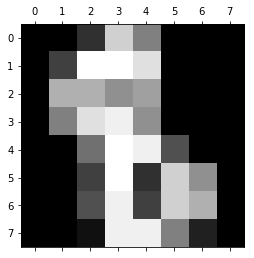

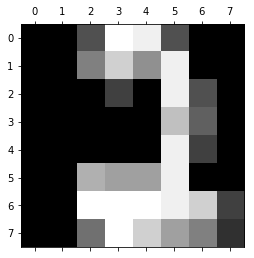

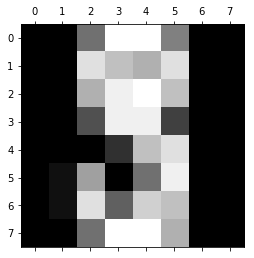

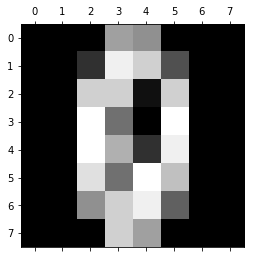

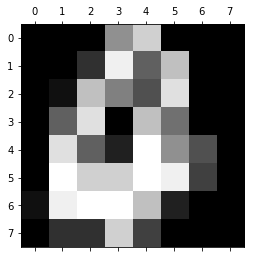

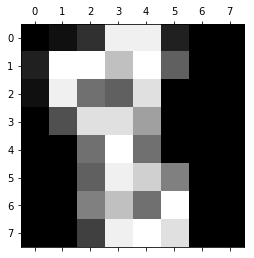

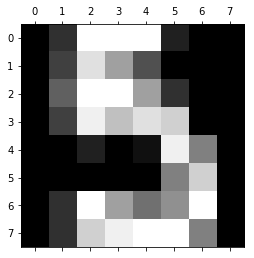

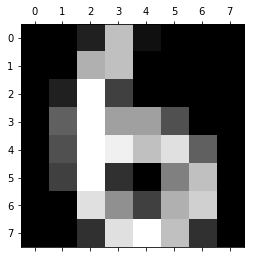

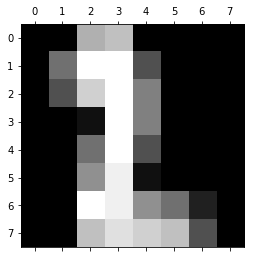

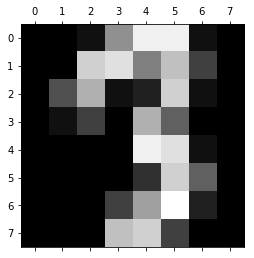

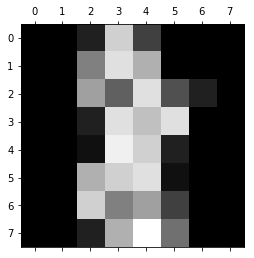

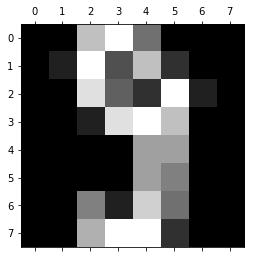

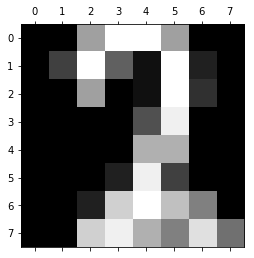

In [12]:
import numpy as np
from collections import Counter
clusters = []
images_of_clusters = []
unique_labels = np.unique(labels)
for i in range(len(unique_labels)):
    cur_clusters = []
    cur_images = []
    for j in range(len(labels)):
        if unique_labels[i] == labels[j]:
            cur_clusters.append(y[j])
            cur_images.append(images[j])
    clusters.append(cur_clusters)
    images_of_clusters.append(cur_images)

error_images = []
for i in range(len(clusters)):
    least_frequent_digit = Counter(clusters[i]).most_common()[-1][0]
    for j in range(len(clusters[i])):
        if clusters[i][j] == least_frequent_digit:
            error_images.append(images_of_clusters[i][j])
            break;
            
for i in range(len(error_images)):
    plt.matshow(error_images[i])
    plt.show()

## Word2vec


1. [Скачайте данные](https://www.kaggle.com/c/word2vec-nlp-tutorial/data)
2. [Установите необходимые библиотеки](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/setting-up-your-system)
3. Внимательно изучите тьториалы, доступные в рамках контеста [Part 1](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words) – [Part 4](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-4-comparing-deep-and-non-deep-learning-methods). Эти статьи очень полезны для понимания принципов анализа текстовых данных в питоне.
4. Согласно тьюториалам подготовить данные и обучить модель word2vec. Полезно засечь время обучения модели.
5. Протестировать модель на датасете, подготовленном Google, с задачами вида: *London → England*, значит, *Berlin → Germany*. Пример вызова нужной функции и описание датасета есть [тьюториале по word2vec](https://rare-technologies.com/word2vec-tutorial/). Сам датасет можно скачать по [ссылке](https://www.dropbox.com/s/prb8n5b5na5qo07/questions-words.txt?dl=0). С чем может быть связано большое число неверных ответов?
6. Привести по 5-10 примеров для задачи поиска лишнего слова *(model.doesnt_match)* и для задачи поиска семантически близких слов *(model.most_similar)*. Проинтерпретировать полученные результаты. Все ли примеры соответствуют здравому смыслу? По каким принципам группируются близкие слова в выбранных вами примерах?

In [2]:
from gensim.models import Word2Vec
import pandas as pd
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
import nltk.data
import logging



def review_to_wordlist(review, remove_stopwords=False):
    review_text = BeautifulSoup(review, 'lxml').get_text()
    review_text = re.sub("[^a-zA-Z]", " ", review_text)
    words = review_text.lower().split()
    return (words)


def review_to_sentences(review, tokenizer, remove_stopwords=False):
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(review_to_wordlist(raw_sentence, remove_stopwords))
    return sentences


if __name__ == "__main__":
    # nltk.download()
    training = pd.read_csv("labeledTrainData_tsv.zip", compression='zip', header=0, delimiter="\t", quoting=3)
    test = pd.read_csv("testData_tsv.zip", compression='zip', header=0, delimiter="\t", quoting=3)
    unlabeled_training = pd.read_csv("unlabeledTrainData_tsv.zip", compression='zip', header=0, delimiter="\t", quoting=3)
    
    print("Read %d labeled train reviews, %d labeled test reviews, " \
    "and %d unlabeled reviews\n" % (training["review"].size,
                                    test["review"].size, unlabeled_training["review"].size))


    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

    sentences = []

    print("Parsing sentences from training set")
    for review in training["review"]:
        sentences += review_to_sentences(review, tokenizer)

    print("Parsing sentences from unlabeled set")
    for review in unlabeled_training["review"]:
        sentences += review_to_sentences(review, tokenizer)

    print(len(sentences))


    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', \
                        level=logging.INFO)

    num_features = 300
    min_word_count = 40
    num_workers = 4
    context = 10
    downsampling = 1e-3

    from gensim.models import word2vec

    print("Training model...")
    model = word2vec.Word2Vec(sentences, workers=num_workers, \
                              size=num_features, min_count=min_word_count, \
                              window=context, sample=downsampling)

    model.init_sims(replace=True)

    model_name = "300features_40minwords_10context"
    model.save(model_name)

Read 25000 labeled train reviews, 25000 labeled test reviews, and 50000 unlabeled reviews

Parsing sentences from training set


/home/mikhail/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/mikhail/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))
/home/mikhail/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You shouldprobably open this file and pass the filehandle intoBeautiful Soup.
  'Beautiful Soup.' % markup)
/home/mikhail/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.happierabroad.com"" looks 

Parsing sentences from unlabeled set


/home/mikhail/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.archive.org/details/LovefromaStranger"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/mikhail/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.loosechangeguide.com/LooseChangeGuide.html"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/mikhail/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.msnbc.msn.com/id/4972055/site/newsweek/"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client 

795538
Training model...


2017-04-04 15:46:52,135 : INFO : collecting all words and their counts
2017-04-04 15:46:52,585 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-04-04 15:46:52,761 : INFO : PROGRESS: at sentence #10000, processed 225803 words, keeping 17776 word types
2017-04-04 15:46:52,841 : INFO : PROGRESS: at sentence #20000, processed 451892 words, keeping 24948 word types
2017-04-04 15:46:52,922 : INFO : PROGRESS: at sentence #30000, processed 671315 words, keeping 30034 word types
2017-04-04 15:46:53,003 : INFO : PROGRESS: at sentence #40000, processed 897815 words, keeping 34348 word types
2017-04-04 15:46:53,088 : INFO : PROGRESS: at sentence #50000, processed 1116963 words, keeping 37761 word types
2017-04-04 15:46:53,175 : INFO : PROGRESS: at sentence #60000, processed 1338404 words, keeping 40723 word types
2017-04-04 15:46:53,260 : INFO : PROGRESS: at sentence #70000, processed 1561580 words, keeping 43333 word types
2017-04-04 15:46:53,348 : INFO : PROGRESS: 

In [19]:
model.accuracy("questions-words.txt")

2017-04-04 16:05:19,672 : INFO : capital-common-countries: 19.1% (21/110)
2017-04-04 16:05:19,970 : INFO : capital-world: 14.7% (10/68)
2017-04-04 16:05:20,167 : INFO : currency: 0.0% (0/40)
2017-04-04 16:05:20,862 : INFO : city-in-state: 2.7% (5/188)
2017-04-04 16:05:22,182 : INFO : family: 62.6% (238/380)
2017-04-04 16:05:25,308 : INFO : gram1-adjective-to-adverb: 6.3% (55/870)
2017-04-04 16:05:27,130 : INFO : gram2-opposite: 8.9% (41/462)
2017-04-04 16:05:32,347 : INFO : gram3-comparative: 56.8% (600/1056)
2017-04-04 16:05:34,224 : INFO : gram4-superlative: 37.4% (189/506)
2017-04-04 16:05:36,554 : INFO : gram5-present-participle: 39.1% (254/650)
2017-04-04 16:05:39,169 : INFO : gram6-nationality-adjective: 17.8% (122/684)
2017-04-04 16:05:43,183 : INFO : gram7-past-tense: 38.0% (401/1056)
2017-04-04 16:05:46,241 : INFO : gram8-plural: 38.3% (311/812)
2017-04-04 16:05:48,312 : INFO : gram9-plural-verbs: 63.4% (350/552)
2017-04-04 16:05:48,314 : INFO : total: 34.9% (2597/7434)


[{'correct': [('BANGKOK', 'THAILAND', 'BERLIN', 'GERMANY'),
   ('BANGKOK', 'THAILAND', 'LONDON', 'ENGLAND'),
   ('BANGKOK', 'THAILAND', 'PARIS', 'FRANCE'),
   ('BEIJING', 'CHINA', 'LONDON', 'ENGLAND'),
   ('BEIJING', 'CHINA', 'TOKYO', 'JAPAN'),
   ('CAIRO', 'EGYPT', 'TOKYO', 'JAPAN'),
   ('CAIRO', 'EGYPT', 'BANGKOK', 'THAILAND'),
   ('HAVANA', 'CUBA', 'PARIS', 'FRANCE'),
   ('HAVANA', 'CUBA', 'BERLIN', 'GERMANY'),
   ('LONDON', 'ENGLAND', 'PARIS', 'FRANCE'),
   ('LONDON', 'ENGLAND', 'BANGKOK', 'THAILAND'),
   ('LONDON', 'ENGLAND', 'BEIJING', 'CHINA'),
   ('MADRID', 'SPAIN', 'PARIS', 'FRANCE'),
   ('MOSCOW', 'RUSSIA', 'TOKYO', 'JAPAN'),
   ('MOSCOW', 'RUSSIA', 'BANGKOK', 'THAILAND'),
   ('MOSCOW', 'RUSSIA', 'BEIJING', 'CHINA'),
   ('PARIS', 'FRANCE', 'BERLIN', 'GERMANY'),
   ('PARIS', 'FRANCE', 'LONDON', 'ENGLAND'),
   ('ROME', 'ITALY', 'MADRID', 'SPAIN'),
   ('ROME', 'ITALY', 'PARIS', 'FRANCE'),
   ('TOKYO', 'JAPAN', 'PARIS', 'FRANCE')],
  'incorrect': [('BANGKOK', 'THAILAND', 'BEIJING

In [21]:
model.doesnt_match("russia moscow japan usa".split())

'moscow'

In [22]:
model.doesnt_match("usa russia london japan".split())

'london'

In [23]:
model.doesnt_match("france england germany berlin".split())

'berlin'

In [24]:
model.doesnt_match("bus car train house".split())

'house'

In [28]:
model.doesnt_match("california texas florida seattle".split()) # выводит неверно

'texas'

In [29]:
model.most_similar("earth")

[('planet', 0.7246519327163696),
 ('venus', 0.5261962413787842),
 ('surface', 0.5247330069541931),
 ('mankind', 0.5244333148002625),
 ('civilization', 0.5144416093826294),
 ('ship', 0.5128659009933472),
 ('vessel', 0.5029398798942566),
 ('apes', 0.4953399896621704),
 ('island', 0.49200019240379333),
 ('land', 0.4893532693386078)]

In [30]:
model.most_similar("moon")

[('mountain', 0.5032123923301697),
 ('venus', 0.49798351526260376),
 ('river', 0.4923921823501587),
 ('fledged', 0.48760733008384705),
 ('sand', 0.48370271921157837),
 ('sun', 0.4803316295146942),
 ('sea', 0.47847041487693787),
 ('skies', 0.4749600887298584),
 ('tilt', 0.4692259430885315),
 ('snowy', 0.4691956043243408)]

In [36]:
model.most_similar("lamp")

[('carpet', 0.6731340885162354),
 ('sliding', 0.6728389859199524),
 ('flashlight', 0.6720430850982666),
 ('mud', 0.6625742316246033),
 ('glass', 0.6553534269332886),
 ('fireplace', 0.6543654799461365),
 ('balloon', 0.6501486301422119),
 ('tree', 0.6469693183898926),
 ('helmet', 0.6437938809394836),
 ('liquid', 0.6417140364646912)]

In [33]:
model.most_similar("car")

[('truck', 0.762599766254425),
 ('bus', 0.6801456809043884),
 ('jeep', 0.6474571824073792),
 ('train', 0.6417087912559509),
 ('bike', 0.6392568945884705),
 ('auto', 0.6065692901611328),
 ('plane', 0.5945748090744019),
 ('helicopter', 0.5922114253044128),
 ('boat', 0.5913236737251282),
 ('cab', 0.5851014256477356)]

In [35]:
model.most_similar("google")

[('internet', 0.6383936405181885),
 ('net', 0.6262655258178711),
 ('online', 0.6256088614463806),
 ('youtube', 0.6217542886734009),
 ('amazon', 0.6166272163391113),
 ('ebay', 0.6033385992050171),
 ('sites', 0.5862144827842712),
 ('sale', 0.5777958631515503),
 ('cd', 0.5683895945549011),
 ('website', 0.5589516758918762)]